In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, ifft2, fftshift, ifftshift

C:\Users\Somya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


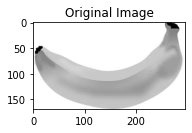

In [24]:
img = cv2.imread('img.jpeg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

In [25]:
f_transform = fft2(img)  # 2D FFT
f_shifted = fftshift(f_transform)  

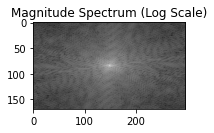

In [26]:
magnitude_spectrum = np.log(np.abs(f_shifted) +1)
plt.subplot(1, 2, 2)
plt.title('Magnitude Spectrum (Log Scale)')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

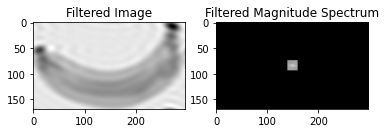

In [33]:
# low pass filter
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2

mask = np.zeros((rows, cols), np.uint8)
mask[crow-10:crow+10, ccol-10:ccol+10] = 1 

f_shifted_filtered = f_shifted * mask

f_ishift = ifftshift(f_shifted_filtered)  
image_filtered = np.abs(ifft2(f_ishift))  

plt.subplot(1, 2, 1)
plt.title('Filtered Image')
plt.imshow(image_filtered, cmap='gray')

magnitude_spectrum_filtered = np.log(np.abs(f_shifted_filtered) + 1)
plt.subplot(1, 2, 2)
plt.title('Filtered Magnitude Spectrum')
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.show()

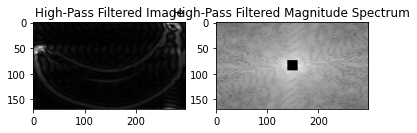

In [32]:
#high pass filter
mask_high_pass = np.ones((rows, cols), np.uint8)
mask_high_pass[crow-10:crow+10, ccol-10:ccol+10] = 0  # Block low frequencies

f_shifted_filtered_high = f_shifted * mask_high_pass

f_ishift_high = ifftshift(f_shifted_filtered_high)
image_filtered_high = np.abs(ifft2(f_ishift_high))


plt.subplot(1, 2, 1)
plt.title('High-Pass Filtered Image')
plt.imshow(image_filtered_high, cmap='gray')

magnitude_spectrum_high = np.log(np.abs(f_shifted_filtered_high) + 1)
plt.subplot(1, 2, 2)
plt.title('High-Pass Filtered Magnitude Spectrum')
plt.imshow(magnitude_spectrum_high, cmap='gray')
plt.show()